In [12]:
import os
import numpy as np
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Epoch 1/300
  1/186 [..............................] - ETA: 57s - loss: 3.2581 - accuracy: 0.0000e+00

2023-06-20 18:48:41.929137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


186/186 [==============================] - ETA: 0s - loss: 2.3217 - accuracy: 0.2623

2023-06-20 18:48:44.763525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


186/186 [==============================] - 3s 16ms/step - loss: 2.3217 - accuracy: 0.2623 - val_loss: 1.8472 - val_accuracy: 0.4394
Epoch 2/300
186/186 [==============================] - 3s 15ms/step - loss: 1.6377 - accuracy: 0.4923 - val_loss: 1.5273 - val_accuracy: 0.5561
Epoch 3/300
186/186 [==============================] - 3s 15ms/step - loss: 1.4461 - accuracy: 0.5544 - val_loss: 1.5976 - val_accuracy: 0.5212
Epoch 4/300
186/186 [==============================] - 3s 15ms/step - loss: 1.3513 - accuracy: 0.5848 - val_loss: 1.4165 - val_accuracy: 0.5727
Epoch 5/300
186/186 [==============================] - 3s 15ms/step - loss: 1.3447 - accuracy: 0.5800 - val_loss: 1.4453 - val_accuracy: 0.5455
Epoch 6/300
186/186 [==============================] - 3s 15ms/step - loss: 1.2879 - accuracy: 0.6029 - val_loss: 1.3677 - val_accuracy: 0.5909
Epoch 7/300
186/186 [==============================] - 3s 15ms/step - loss: 1.2303 - accuracy: 0.6136 - val_loss: 1.3384 - val_accuracy: 0.5818
Epoc

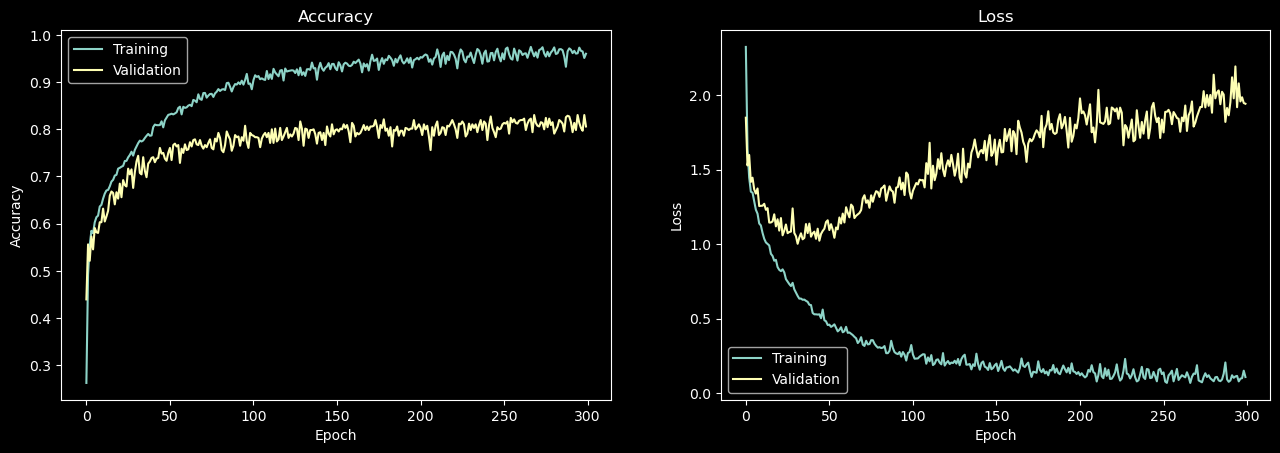

In [15]:
def load_data(csvs_dir) -> tuple:
    train = np.empty((0, 64))
    valid = np.empty((0, 64))
    for csv_name in sorted(os.listdir(csvs_dir)):
        if csv_name.endswith('csv'):
            csv_path = os.path.join(csvs_dir,csv_name)
            class_name = csv_path.split('/')[-1].split('_')[0]
            class_name = int(class_name.lstrip('0'))
            # print(class_name)   # 1~26
            val = np.loadtxt(csv_path,delimiter=',')
            class_value = np.full((val.shape[0], ), class_name) # label
            val = np.column_stack((val, class_value))
            # print(val.shape)
            train_ = val[:int(len(val)*0.9), :]
            valid_ = val[int(len(val)*0.9):, :]
            # print(train_.shape)
            # print(valid_.shape)
            train = np.concatenate((train, train_), axis=0)
            valid = np.concatenate((test, valid_), axis=0)
    train = np.random.permutation(train)     
    valid = np.random.permutation(valid)
    train_data = train[:, :63]
    train_labels = train[:, -1]
    valid_data = valid[:, :63]
    valid_labels = valid[:, -1]
    return (train_data, train_labels), (valid_data, valid_labels)

def test_load_data(csvs_dir) -> tuple:
    test = np.empty((0, 64))
    for csv_name in sorted(os.listdir(csvs_dir)):
        if csv_name.endswith('csv'):
            csv_path = os.path.join(csvs_dir,csv_name)
            class_name = csv_path.split('/')[-1].split('_')[0]
            class_name = int(class_name.lstrip('0'))
            # print(class_name)   # 1~26
            val = np.loadtxt(csv_path,delimiter=',')
            class_value = np.full((val.shape[0], ), class_name) # label
            val = np.column_stack((val, class_value))
            test_ = val[:, :]
            test = np.concatenate((test, test_), axis=0)     
    test = np.random.permutation(test)
    test_data = test[:, :63]
    test_labels = test[:, -1]
    return (test_data, test_labels)

def plot_acc_loss(h):
    plt.figure(figsize=(15.6, 4.8), dpi=100)
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)
    
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)
    plt.show()

def build_model():
    input_shape = (63,)
    model = models.Sequential()
    model.add(layers.Dense(2560, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(1280, activation='relu'))
    model.add(layers.Dense(640, activation='relu'))
    model.add(layers.Dense(320, activation='relu'))
    model.add(layers.Dense(26, activation='softmax'))
    # model.add(layers.Dense(64, activation='relu'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


if __name__ == '__main__':
    csvs_dir = '/Users/hsyoon/Downloads/dataset2/csv'
    (train_data, train_labels), (valid_data, valid_labels) = load_data(csvs_dir)
    train_data.reshape(-1, 63)
    train_labels = to_categorical(train_labels-1)
    test_labels = to_categorical(valid_labels-1)
    test_csvs_dir = '/Users/hsyoon/Downloads/dataset_valid/csv'
    (test_data, test_labels) = test_load_data(test_csvs_dir)
    test_labels = to_categorical(test_labels-1)
    
    model = build_model()
    history = model.fit(train_data, train_labels, epochs=300, validation_data=(valid_data, valid_labels))
    loss, acc = model.evaluate(test_data, test_labels)
    print("test_acc:", round(acc, 4))
    print("test_loss:", round(loss, 4))
    plot_acc_loss(history)